# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)



df = pd.DataFrame(train_data, columns=["colummn"])
df.to_csv('test_data.csv', index=False)


df = pd.DataFrame(train_labels, columns=["colummn"])
df.to_csv('test_labels.csv', index=False)


training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
    ### STUDENT START ###

    for i in range(num_examples):                
        lbls = newsgroups_train.target_names[train_labels[i]]
        print ('\t=== TRAINING EXAMPLE',i,' === ')
        print (train_data[i])
        print ('\t=== LABELLED AS "{0}. === \n\n\n'.format(lbls))

### STUDENT END ###

P1(5)

	=== TRAINING EXAMPLE 0  === 
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
	=== LABELLED AS "comp.graphics. === 



	=== TRAINING EXAMPLE 1  === 


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrat

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [4]:
def P2():
    ### STUDENT START ###

    print('(1) What is the size of the vocabulary? What is the average '
          'number of non-zero features per example?' 
          'What is the fraction of the non-zero entries in the matrix? ' 
          'What are the 0th and last feature strings (in alphabetical order)? \n')
    
    cvec = CountVectorizer()
    feature = cvec.fit_transform(raw_documents=train_data)
    size_of_vocabulary =  feature.shape[1]
    print ('--- The size of the vocabulary {0}.'.format(size_of_vocabulary))

    feature_array = feature.toarray()
    if len(np.nonzero(feature_array.sum(axis=0))[0]) != feature.shape[1]:
        print ('--- A column of zeros: At least one feature in the vocabulary '
               ' does not appear in the training set')

    average_num_of_non_zero =  feature.nnz / float(len(train_data))       
    print ('--- The average number of non-zero features per example is {0:.3f}.'.\
        format(average_num_of_non_zero))


    len(np.nonzero(feature)[0]) / float(len(train_data))
    nnz_feature = np.array([feature[i].nnz for i in range(len(train_data))])
    nnz_feature.mean()
    fraction = 100*float(feature.nnz) / (feature.shape[0]*feature.shape[1])
    print ('--- The fraction of the non-zero entries in the matrix is {0:.3f}% .'.\
        format(fraction))
    feature_strings = cvec.get_feature_names()
    feature_strings.sort()
    print ('--- The 0th feature string is "{0}"'.format(feature_strings[0]))
    print ('--- The last feature string is "{0}"'.format(feature_strings[-1]))
    print ()
    
    print('(2) Confirm the size of the vocabulary. What is the average number '
          'of non-zero features per example?\n')

    myvocab = ["atheism", "graphics", "space", "religion"]
    cvec_myvocab = CountVectorizer(vocabulary=myvocab)
    feature_myvocab = cvec_myvocab.transform(raw_documents=train_data)
    average_num_of_non_zero = feature_myvocab.nnz / float(len(train_data))
    print ('--- The size of the vocabulary:', feature_myvocab.shape)
    print ('--- The average number of non-zero features per example is '
           ' {0:.3f}.'. format( average_num_of_non_zero))
    
  

    print('\n\n(3) Now transform the training data into a matrix of character '
          ' bigram and trigram feature vectors. What is the size of the vocabulary?\n')
      
    cvec_ngram = CountVectorizer(analyzer='char', ngram_range=(2,3))
    feature_ngram = cvec_ngram.fit_transform(raw_documents=train_data)
    print
    print ('--- The size of the vocabulary when extracting bigram and trigram character ' \
          'features is {0}.'.format(feature_ngram.shape[1]))

         
    print('\n\n(4) Now transform the training data into a matrix of word unigram feature vectors '
          'and prune words that appear in fewer than 10 documents. What is the size of the vocabulary?\n')
    
    cvec_prune = CountVectorizer(min_df=10)
    feature_prune = cvec_prune.fit_transform(raw_documents=train_data)
    print ('---The size of the vocabulary when pruning words that appear in fewer than 10 ' \
          'documents is {0}.'.format(feature_prune.shape[1]))

    print('\n\n(5) Now again transform the training data into a matrix of word unigram feature '
          'vectors. What is the fraction of words in the development vocabulary that' 
          'is missing from the training vocabulary?\n' )
    
    fraction = 100*float(len(set(cvec.fit(raw_documents=dev_data).get_feature_names()) - 
                             set(cvec.fit(raw_documents=train_data).
                                 get_feature_names())))/len(set(cvec.fit(raw_documents=dev_data).
                                                                get_feature_names()))
        
    print ('---The fraction of words in the development vocabulary that is '
           'missing from the training vocabulary is {0:.2f}% '.\
        format(fraction))
 
### STUDENT END ###
    

P2()

(1) What is the size of the vocabulary? What is the average number of non-zero features per example?What is the fraction of the non-zero entries in the matrix? What are the 0th and last feature strings (in alphabetical order)? 

--- The size of the vocabulary 26879.
--- The average number of non-zero features per example is 96.706.
--- The fraction of the non-zero entries in the matrix is 0.360% .
--- The 0th feature string is "00"
--- The last feature string is "zyxel"

(2) Confirm the size of the vocabulary. What is the average number of non-zero features per example?

--- The size of the vocabulary: (2034, 4)
--- The average number of non-zero features per example is  0.268.


(3) Now transform the training data into a matrix of character  bigram and trigram feature vectors. What is the size of the vocabulary?

--- The size of the vocabulary when extracting bigram and trigram character features is 35478.


(4) Now transform the training data into a matrix of word unigram feature vec

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

k Nearest Neighbors:
  K  f1_score
  1  0.380503
  2  0.380542
  3  0.408415
  4  0.403123
  5  0.428761
  6  0.446665
  7  0.450479
  8  0.446984
  9  0.436567
 10  0.427850
 11  0.426611
 12  0.421103
 13  0.424043
 14  0.422448
 15  0.432634
 16  0.434354
 17  0.448585
 18  0.431870
 19  0.436579
When K = 7 , maxmum F1 score for the KNN classifier is 0.45047910006117586 


Multinomial Naive Bayes:
 alpha  f1_score
 0.000  0.747241
 0.002  0.770559
 0.004  0.772391
 0.006  0.772487
 0.008  0.775166
 0.010  0.775166
 0.020  0.783038
 0.030  0.783146
 0.040  0.784443
 0.050  0.785856
 0.060  0.786201
 0.070  0.786315
 0.080  0.788256
 0.090  0.790010
 0.100  0.790305
 0.200  0.787630
 0.300  0.787645
 0.400  0.787881
 0.500  0.786286
 0.600  0.786075
 0.700  0.784746
 0.800  0.784501
 0.900  0.781086
 1.000  0.777732
When alpha = 0.1 , maxmum F1 score for the MultinomialNB classifier is 0.7903052385098862 


Logistic Regression:
    C  f1_score
 0.01  0.664700
 0.02  0.664125
 0.03  0.

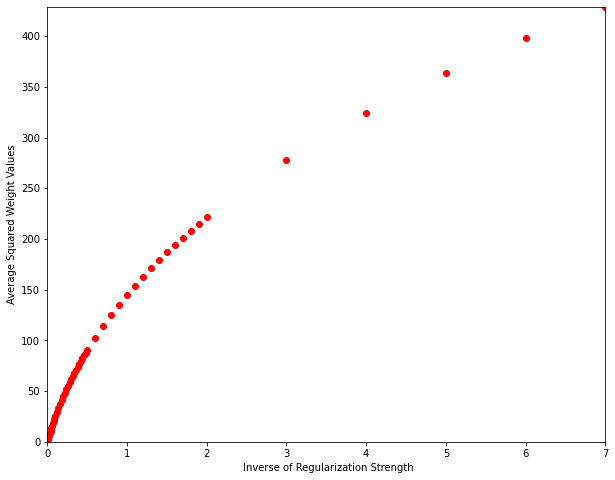

In [5]:
def P3():
    ### STUDENT START ###
    
    import warnings
    warnings.filterwarnings('ignore')
    cvec = CountVectorizer()
    feature_vectors_train = cvec.fit_transform(raw_documents=train_data)
    feature_vectors_dev = cvec.transform(raw_documents=dev_data)

    
    #======== kNN ========#
      
    print ('k Nearest Neighbors:')
    print ('=============================')
    f1 = []
    param = np.arange(1,20,1)
    for k in param: 
        kNN_model = KNeighborsClassifier(n_neighbors = k)
        kNN_model.fit(feature_vectors_train, train_labels)
        dev_predicted_labels = kNN_model.predict(feature_vectors_dev)       
        f1_score = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels,average='weighted')
        f1.append((k, f1_score))
    df = pd.DataFrame(f1, columns=['K', 'f1_score'])
    print (df.to_string(index = False))
    max_f1_score = df.loc[:,'f1_score'].max()
    index = df['f1_score'].idxmax() 
    optimal_K = df.at[index,'K']       
    print ('When K =', optimal_K, ', maxmum F1 score for the KNN classifier is', max_f1_score, '\n')
  

    #======== MultinomialNB ========#
        
    print ('\nMultinomial Naive Bayes:')
    print ('=============================')
    # Let's try values of alpha up to 1
    alpha = np.concatenate([np.arange(0,0.01,0.002),np.arange(0.01,0.1,0.01),
                            np.arange(0.1,1.1,0.1)])   
    f1 = []
    for al in alpha: 
        NB_model = MultinomialNB(alpha=al)
        NB_model.fit(feature_vectors_train, train_labels)
        dev_predicted_labels = NB_model.predict(feature_vectors_dev)
        f1_score = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels,average='weighted')
        al = al.round(4)
        f1.append((al, f1_score))  
    df = pd.DataFrame(f1, columns=['alpha', 'f1_score'])
    print (df.to_string(index = False))
    max_f1_score = df.loc[:,'f1_score'].max()
    index = df['f1_score'].idxmax() 
    optimal_alpha = df.at[index,'alpha']       
    print ('When alpha =', optimal_alpha, 
           ', maxmum F1 score for the MultinomialNB classifier is', max_f1_score, '\n')
        
  
    #======== Logistic Regression ========#
    
    print ('\nLogistic Regression:')
    print ('==========================')

    inv_regul_str = np.concatenate([np.arange(0.01,0.1,0.01),np.arange(0.1,0.5,0.02),
                                    np.arange(0.5,2,0.1),np.arange(2,8,1)])
    f1 = []
    for cval in inv_regul_str: 
        LR_model = LogisticRegression(penalty='l2', C=cval, solver="liblinear", multi_class="auto")
        LR_model.fit(feature_vectors_train, train_labels)
        dev_predicted_labels = LR_model.predict(feature_vectors_dev)      
        f1_score = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels,average='weighted')
        cval = cval.round(4)
        f1.append((cval, f1_score)) 
    df = pd.DataFrame(f1, columns=['C', 'f1_score'])
    print (df.to_string(index = False))
    max_f1_score = df.loc[:,'f1_score'].max()
    index = df['f1_score'].idxmax() 
    optimal_c = df.at[index,'C']
    print ('When C Value =', optimal_c, 
           ', maxmum F1 score for the Logistic Regression classifier is', max_f1_score, '\n')
    
    squared_sum = np.zeros(4*inv_regul_str.shape[0]).reshape(inv_regul_str.shape[0],4)
    for i,c in enumerate(inv_regul_str):
        LR_model = LogisticRegression(penalty='l2', C=c, solver="liblinear", multi_class="auto")
        LR_model.fit(feature_vectors_train, train_labels)
        squared_sum[i,:] = np.square(LR_model.coef_).sum(axis=1)

    squared_sum_short = squared_sum[4::5,:]
    inv_regul_str_short = inv_regul_str[4::5]
    classes = [c.rjust(18) for c in newsgroups_train.target_names]
 
    print('==============')
    print("I plot the relationship between logistic regression's sum of squared weights vs. C value ")
    classes.insert(0, 'C')
    t2 = []
    t2.append(classes)
    for i in range(10):
        t2.append([inv_regul_str_short[i], squared_sum_short[i,0], squared_sum_short [i,1],
                      squared_sum_short [i,2], squared_sum_short [i,3]])
    tb =  pd.DataFrame(t2)
    tb.columns = [''] * len(tb.columns)
    print(tb.to_string(index=False))
   
    squared_sum_mean = squared_sum[:,1:].mean(axis=1)
    plt.figure(figsize=(10, 8))
    plt.scatter(inv_regul_str, squared_sum_mean, c='red')
    plt.xlabel(" Inverse of Regularization Strength")
    plt.ylabel("Average Squared Weight Values")
    plt.ylim([0, squared_sum_mean.max()])
    plt.xlim([0, inv_regul_str.max()])

### STUDENT END ###
       
P3()

ANSWER:

 

#### Q4:  Why doesn't k-Nearest Neighbors work well for this problem?

(1) Firstly, it is important for KNN models to measure the weight of neighbors, so that the weight of the closer neighbor is greater than the weight of the far neighbor. However,  in this problem we assigned the same weight to all the features in the training set. In this work, all training samples and testing samples share many unweighted common words that cause the distance between any pair of samples to be similar, without taking the case of their topics, which will cause many predictions to be inaccurate . The solution is to give more weight to the words related to the topic, rather than to the frequency of the common words.

(2) Secondly, the kNN model is based on a measure of proximity/similarity, based on the characteristics of the items (acting as coordinates or dimensions). In K-NN learning, local approximation and all calculations are postponed until classification.  The neighbors are all taken from a set of objects that have been correctly classified.  The disadvantage of the k-nearest neighbor algorithm is that it is very sensitive to the local structure of the data. In topic classification, the challenge is that the number of features defining the space is almost unlimited, but we train our model with a very limited number of features: the features present in the example are taken from the training set. Therefore, we have omitted many other dimensions.

 
 
#### Q5: Why doesn't Logistic Regression work as well as Naive Bayes does?
 
(1) When the data set is relatively small, Naive Bayes performs better and should be used. It can achieve good results with less data demand. When the data set is relatively large, Logistic Regression should be selected. Naive Bayes uses a relatively strict conditional independence assumption. In order to calculate P(y|x), we can use statistical methods to count the number of occurrences of P(x|y) and P(y) in the data set, thereby obtaining P(x |y) and P(y). Therefore, the amount of data required is smaller. When Logistic Regression is calculated, a linear search is performed in the entire parameter space, and the data set required is larger.

(2) Naive Bayes (NB) and logistic regression models obtain  their weights in two different ways. The reason for the difference lies in the conditional independence assumption of the naive Bayes method. Because of the conditional independence assumption, Naive Bayes can not use gradient descent, but directly count the logical occurrence ratio of each feature as a weight. In logistic regression, the conditional independence assumption does not hold. Through the gradient descent method, the coupling information between the features can be obtained, and the corresponding weights can be obtained.

  

#### Q6: What is the relationship between logistic regression's sum of squared weights vs. C value?

(1) As shown in the plot above, C is the inverse of regularization strength. Smaller values of C ( bigger value of regularization ) results in stronger regularization (stronger penalty) and hence decreases weights. The same, as C goes bigger ( smaller value of regularization)  the sum of the weights becomes bigger. If the penalty is too strong, the model will underestimate the weights and underfit the problem. If the penalty is too weak, the model will be allowed to overfit the training data.

(2) In this problem the L2 regularization has been used. The increase of C value will increase the sum of the squares of all weight w parameters. The decrease of C ( i.e. increase of regularization or penalty) will  force all w to be as close as possible to zero but not zero (the derivative of L2 tends to zero). 


 

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [8]:
def P4():
    ### STUDENT START ###
    
    def table(CV):
        feature_vectors = CV.fit_transform(raw_documents=train_data)
        LR_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
        LR_model.fit(feature_vectors, train_labels)
 
        
        part = np.argpartition(LR_model.coef_, -5)[:,-5:]
        for i in range(len(newsgroups_train.target_names)):
            part[i,:] = part[i, np.argsort(np.take(LR_model.coef_[i,:], part[i,:]))[::-1]]

        part = part.flatten()
        weights = np.take(LR_model.coef_, part, axis=1).T
        word_features = CV.get_feature_names()

        main_features = np.empty(20).astype('str')
        for i in range(part.shape[0]):
            main_features[i] = word_features[part[i]].ljust(14)
        classes = [c.rjust(18) for c in newsgroups_train.target_names]
        classes.insert(0, 'features')
        t2 = []
        t2.append(classes)
        for i in range(20):
            f = main_features[i]
            t2.append([f, weights[i,0], weights[i,1], weights[i,2], weights[i,3]])
        tb =  pd.DataFrame(t2)
        tb.columns = [''] * len(tb.columns)

        print(tb.to_string(index=False))

### I made two tables: Table A is of default Countvectorizer;
### Table B is for bigram. It will be good for further analysis. 
        
    print('Table A using defalt CountVectorizer')
    table(CountVectorizer())
    print()
    print('Table B using ngram CountVectorizer')
    table(CountVectorizer(analyzer='word', ngram_range=(2,2)))

    
### STUDENT END ###

P4()

Table A using defalt CountVectorizer
                                                                                               
       features         alt.atheism       comp.graphics           sci.space  talk.religion.misc
 atheists                  0.833631          -0.0932755           -0.267641           -0.637543
 bobby                     0.823581           -0.191205           -0.286359           -0.387197
 religion                  0.798252           -0.508673           -0.658825          -0.0505899
 atheism                   0.794495           -0.348433           -0.367201           -0.377049
 deletion                  0.723518           -0.249531           -0.272431            -0.27046
 graphics                 -0.640687             1.62647            -1.10296           -0.626293
 image                    -0.469189             1.11685           -0.672359           -0.381216
 file                     -0.275319             1.05895           -0.682625           -0.506116
 3d

ANSWER:

There are several surprising Bigram features:

(1) Bigrams consisting of stop words are appearing at the top of the list. 

(2) In table A I used the default CountVectorizer, the most common words in one class appear less frequently in other classes. It explains that the commonly used words in each class have distinct characteristics of  that class. Therefore, we see that the weight of those top 5 features in one class have relatively large positive values for the corresponding class, and the absolute values are large. But their weight is  negative for other classes. The characteristics of these top 5 words marked the characteristics of the vocabulary in that class that can be classified into it, rather than other categories.

(2) In table B, I used bigram. Some of the two words are categorized in one class (rather than other classes) and their weight is large for their own class, and its absolute value is large, but it is negative for the other three classes. This means they have the characters of their own classes. Some places the typical two-tuples are similar  like "is not ", " in this", or "for the". They do not exclude other classes, so they are not good features that can identify classes. In addition, the absolute value of their weights of them are not so large.
 

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [9]:
def better_preprocessor(s):
    ### STUDENT START ###
    import re
    
    s = re.sub("[^A-Za-z0-9 \\n]", " ", s)
    s = re.sub("(\w{%d})\w+" % 5, "\\1", s)
    s = re.sub("([\d]+)", " number ", s)
    s = s.lower()

    return s

    ### STUDENT END ###
       
    
def P5():
    ### STUDENT START ###

    def no_preprocessing(data):
        return data
    
    def preprocessing(data):
        feature_vectors_train = data.fit_transform(raw_documents=train_data)
        feature_vectors_dev = data.transform(raw_documents=dev_data)
        LR_model = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
        LR_model.fit(feature_vectors_train, train_labels)
        dev_predicted_labels = LR_model.predict(feature_vectors_dev)
        f1_score = metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted_labels, average='weighted')
        return [feature_vectors_train.shape[1], f1_score]
    
    print()
    
    [size_original, F1_original] = preprocessing(CountVectorizer(preprocessor = no_preprocessing)) 
    print ('(1) Using original_preprocessor: size =', 
           size_original, '; F1 Score = {0:.4f}\n'.format(F1_original)) 

    [size_better, F1_better] = preprocessing(CountVectorizer(preprocessor = 
                                                             better_preprocessor,stop_words='english'))     
    print ('(2) Using better_preprocessor: size =', 
           size_better, '; F1 Score ={0:.4f}\n'.format(F1_better))
    
    improvement = F1_better-F1_original
    print ('(3) Better_preprocessor impoves empty_preprocessor in F1 score by {0:.4f}\n'.format(improvement))
    
    reduce = 100*float(1-(size_better)/size_original)
    print ('(4) The size of the dictionary with better_preprocessor '
           'has reduced {0:.1f}% of the size of original_preprocessor.'.format(reduce))

    ### STUDENT END ###

P5()


(1) Using original_preprocessor: size = 33291 ; F1 Score = 0.7069

(2) Using better_preprocessor: size = 14112 ; F1 Score =0.7361

(3) Better_preprocessor impoves empty_preprocessor in F1 score by 0.0292

(4) The size of the dictionary with better_preprocessor has reduced 57.6% of the size of original_preprocessor.


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).


Evaluate of the L1 regularization strength, vocabulary size,and f1 score associated with the new model is shown in Table:
 A:f1(No Reg)  B:f1(L2)   C-value  f1(L1,c[i])  nz_weights  size(pruned)  C: f1(L2,pruned)   C-A    C-B 
       0.6908    0.6947    0.0005       0.1842           4             1            0.2408 -0.450  0.057
       0.6908    0.6947    0.0010       0.2449           6             3            0.3394 -0.351  0.094
       0.6908    0.6947    0.0050       0.3991          22            13            0.4348 -0.256  0.036
       0.6908    0.6947    0.0100       0.4221          35            17            0.4648 -0.226  0.043
       0.6908    0.6947    0.0500       0.5816         214           122            0.6381 -0.053  0.056
       0.6908    0.6947    0.1000       0.6453         370           215            0.6788 -0.012  0.033
       0.6908    0.6947    0.5000       0.6909        1238           740            0.6484 -0.042 -0.042
       0.6908    0.6947    1.0000    

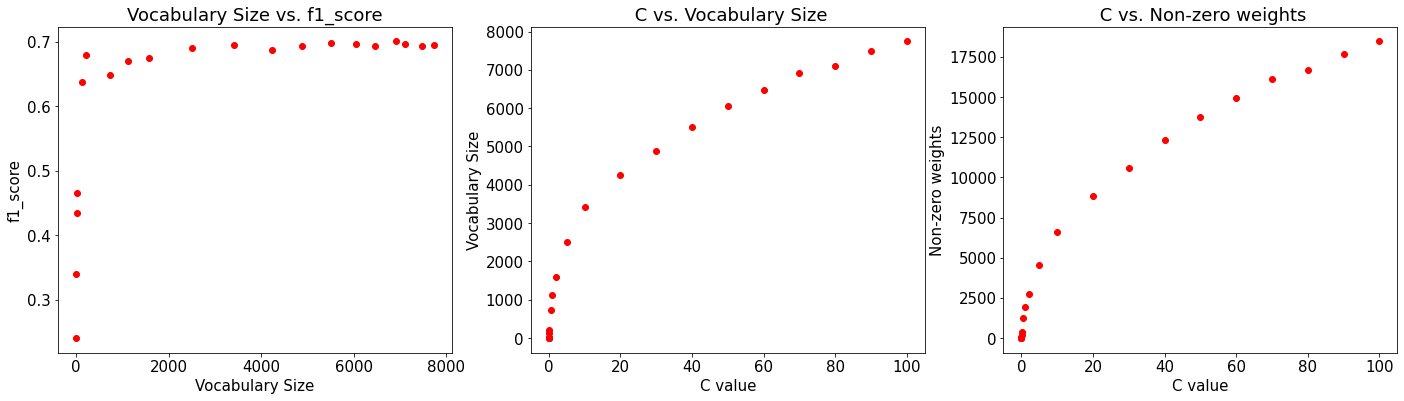

In [24]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0) 
        
    ### STUDENT START ###

    c = np.concatenate([np.array([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5]),np.linspace(10,100,10)])
        
    f1_score = np.zeros(len(c))
    vocab_size = np.zeros(len(c)).astype('u4')
    nonzero_weights = np.zeros(len(c)).astype('u4')
    f1_score_L2_pruned= np.zeros(len(c))
    f1_score_L2_unpruned= np.zeros(len(c))    
    results = np.empty(shape=(1,6))
    results = []
    
    for i in range(len(c)):

        cvec = CountVectorizer()
        feature_vectors_train = cvec.fit_transform(raw_documents=train_data)
        feature_vectors_dev = cvec.transform(raw_documents=dev_data)
  
        LR_model = LogisticRegression(tol=0.015)
        LR_model.fit(feature_vectors_train, train_labels)
        dev_predicted_labels = LR_model.predict(feature_vectors_dev)
        f1_fullsize = round(metrics.f1_score(y_true=dev_labels, 
                                             y_pred=dev_predicted_labels, average='weighted'), 4)
 
        LR_model_l1 = LogisticRegression(penalty='l1', C = c[i], tol=0.015, solver='liblinear')
        LR_model_l1.fit(feature_vectors_train, train_labels)
        dev_predicted_labels_l1 = LR_model_l1.predict(feature_vectors_dev)
        f1_score_l1 = round(metrics.f1_score(y_true=dev_labels, 
                                             y_pred=dev_predicted_labels_l1,average='weighted'), 4)

  
        vocab_size[i] = np.count_nonzero(np.apply_along_axis(np.count_nonzero, 0, LR_model_l1.coef_))
        nonzero_weights[i] = np.apply_along_axis(np.count_nonzero, 0, LR_model_l1.coef_).sum()
        mask = (LR_model_l1.coef_!=0)
        idx = mask.any(axis=0)
        feature_vectors_train_pruned = feature_vectors_train[:, idx]
        feature_vectors_dev_pruned = feature_vectors_dev[:, idx]

        LR_model_l2 = LogisticRegression(penalty='l2', C = 0.5, tol=0.015)
 
        LR_model_l2.fit(feature_vectors_train, train_labels)
        dev_predicted_labels_unpruned = LR_model_l2.predict(feature_vectors_dev)
        f1_score_unpruned = round(metrics.f1_score(y_true=dev_labels, 
                                             y_pred=dev_predicted_labels_unpruned,average='weighted'), 4)
 
        LR_model_l2.fit(feature_vectors_train_pruned, train_labels)
        dev_predicted_labels_pruned = LR_model_l2.predict(feature_vectors_dev_pruned)
        f1_score_L2_pruned[i] = round(metrics.f1_score(y_true=dev_labels, 
                                       y_pred=dev_predicted_labels_pruned,average='weighted'), 4)
 

        LR_model_l2.fit(feature_vectors_train, train_labels)
        l2_nonzero_weights = np.apply_along_axis(np.count_nonzero, 0, LR_model_l2.coef_).sum()
        l2_vocab_size = np.count_nonzero(np.apply_along_axis(np.count_nonzero, 0, LR_model_l2.coef_))
        
        change_of_nonzero_weight = round(nonzero_weights[i]/l2_nonzero_weights, 3)
        change_of_vocab_size = round(vocab_size[i]/l2_vocab_size, 3)

        change1 = round(f1_score_L2_pruned[i]-f1_fullsize, 3)        
        change2 = round(f1_score_L2_pruned[i]-f1_score_l1, 3)    
        results.append([f1_fullsize, f1_score_unpruned, c[i], f1_score_l1,  nonzero_weights[i],vocab_size[i], f1_score_L2_pruned[i], change1, change2 ]) 
        
    table = pd.DataFrame(results, columns = ['A:f1(No Reg)', 
                                             'B:f1(L2)','C-value', 
                                             'f1(L1,c[i])', 'nz_weights',
                                             'size(pruned)','C: f1(L2,pruned)', ' C-A ', ' C-B '])
    
    print()
    print('Evaluate of the L1 regularization strength, vocabulary size,' 
          'and f1 score associated with the new model is shown in Table:')
    print(table.to_string(index=False))
    print()

    print('A plot of f1 score vs. log vocabulary size, each point'
          ' corresponds to a specific L1 regularization strength used to reduce the vocabulary:')
    
    fig, ((ax0, ax1, ax2)) = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
    plt.rcParams.update({'font.size':15})   
    
    ax0.scatter( table['size(pruned)'], table['C: f1(L2,pruned)'], c='red')
    ax0.set_title('Vocabulary Size vs. f1_score')
    ax0.set_xlabel("Vocabulary Size")
    ax0.set_ylabel("f1_score")
    ax1.scatter(table['C-value'], table['size(pruned)'], c='red')
    ax1.set_title(' C vs. Vocabulary Size')
    ax1.set_xlabel("C value")
    ax1.set_ylabel("Vocabulary Size")
    ax2.scatter( table['C-value'], table['nz_weights'], c='red')
    ax2.set_title(' C vs. Non-zero weights')
    ax2.set_xlabel("C value")
    ax2.set_ylabel("Non-zero weights")
    

    
### STUDENT END ###

P6()

ANSWER:

 
#### How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

(1) As shown in the table and in Figure 1, after reaching a proper regularization value (C=30) , the performance of the models based on reduced vocabulary is better than that based on full vocabulary (Refer to column 'C-A' and 'C-B' in the Table).

(2) L1/L2 regularized  models are powerful for feature interpretation and selection, they are useful for selecting a strong subset of features for improving model performance.

(3)  In addition, the L1 penalty produced non-zero weights while the L2 penalty did not produce any weight equal to zero. It meets the definition of L2. 








### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

Accuracy for a Logistic Regression classifier using TfidfVectorizer: 76.33%
Percentage of incorrectly predicted labels (R>1): 23.67% (=1-Accuracy)

929.36   talk.religion.misc        comp.graphics 

325.0   talk.religion.misc        comp.graphics 

287.31          alt.atheism   talk.religion.misc 

216th DOCUMENT: R = 929.36
=== Predicted Category (prob = 0.9937): comp.graphics
=== Label Category  (prob = 0.0011): talk.religion.misc

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announceme

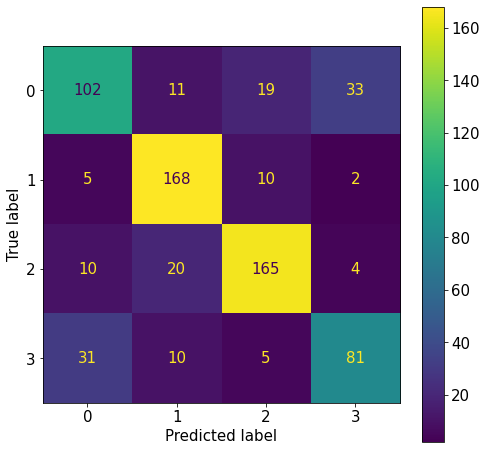

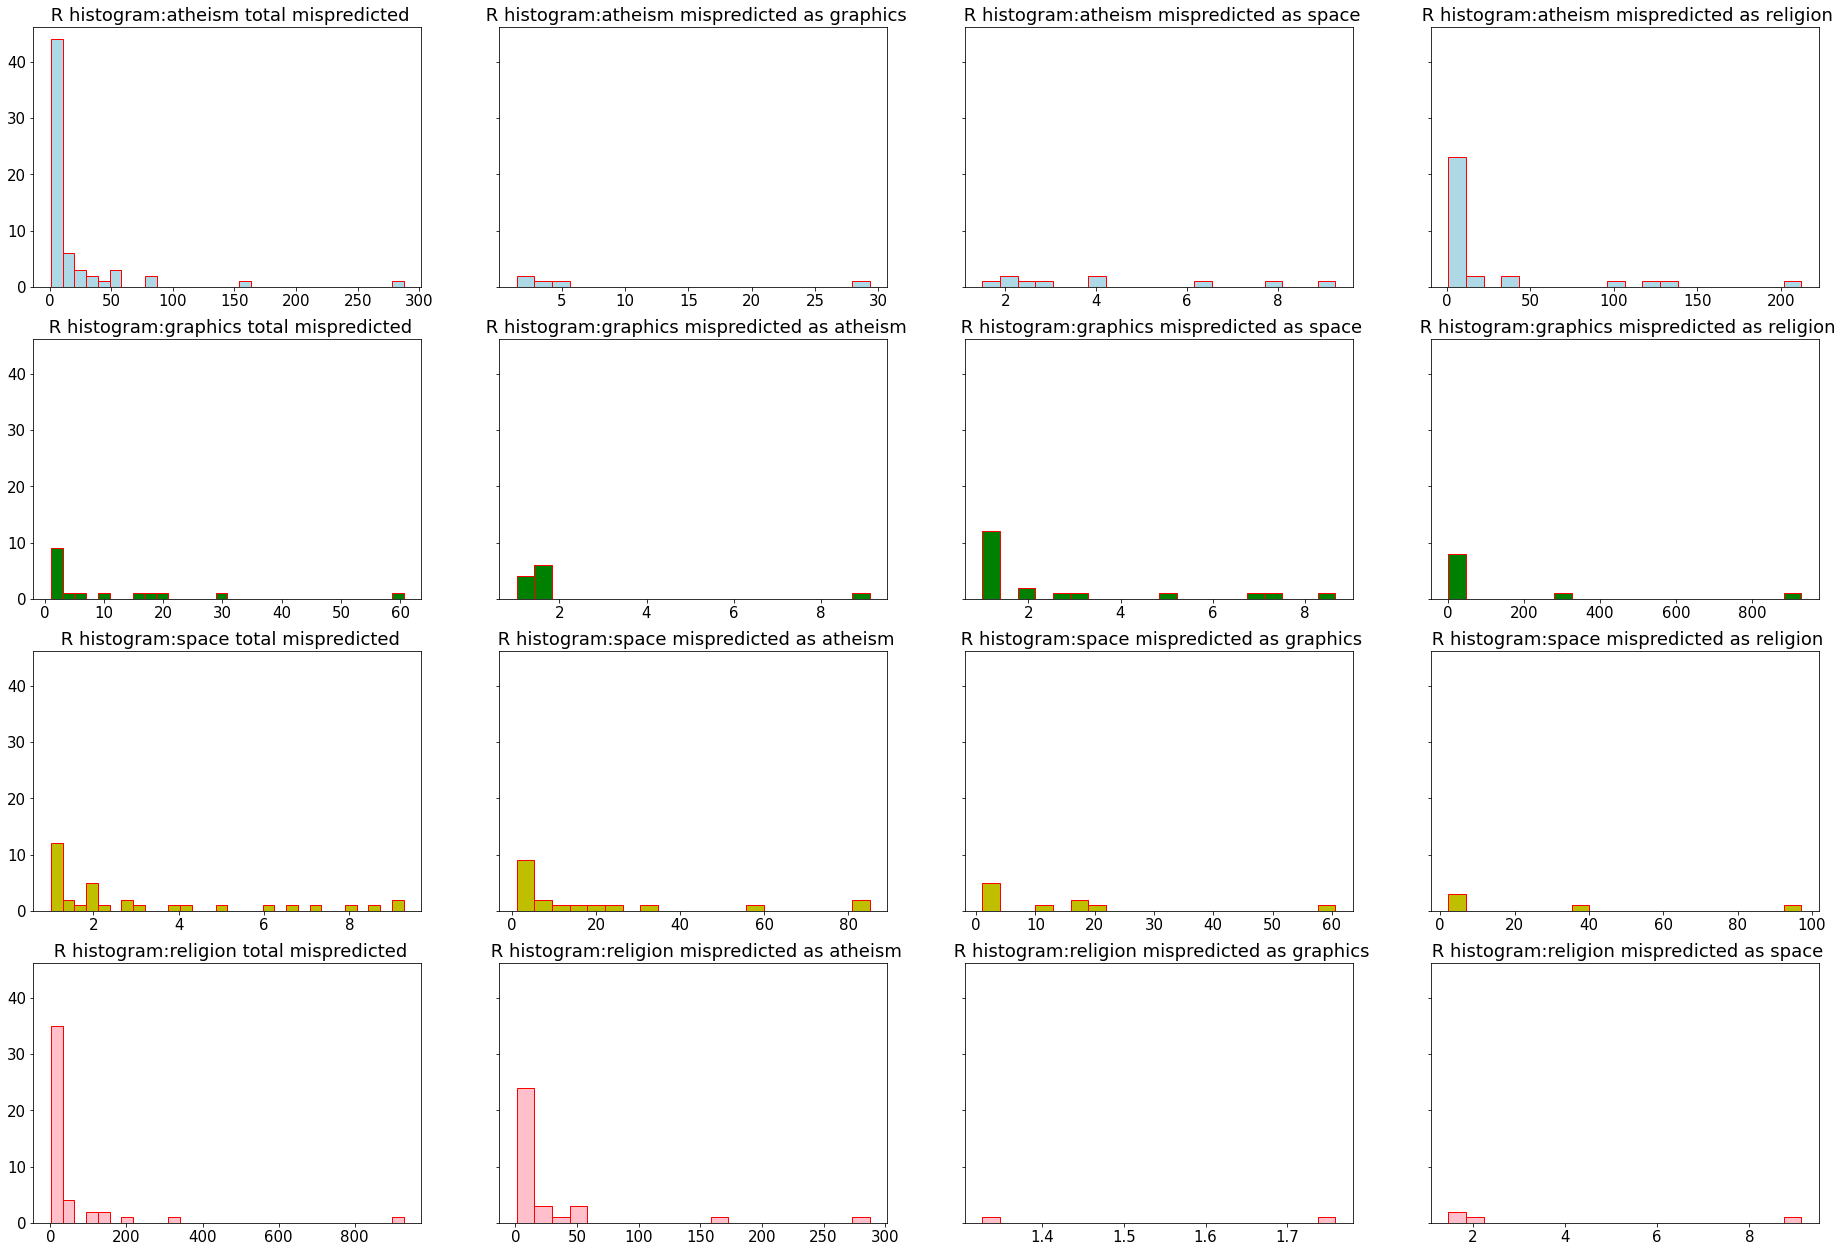

In [19]:
def P7():
### STUDENT START ###

    from sklearn.metrics import plot_confusion_matrix
    
    
    TFIDF = TfidfVectorizer()
    feature_vectors_train = TFIDF.fit_transform(raw_documents=train_data)
    LR_model = LogisticRegression( C=100, solver="liblinear", multi_class="auto")
    LR_model.fit(feature_vectors_train, train_labels)
    feature_vectors_dev = TFIDF.transform(raw_documents=dev_data)
    dev_preds = LR_model.predict(feature_vectors_dev)
 
    accuracy = 100*metrics.accuracy_score(y_true=dev_labels, y_pred=dev_preds)
    print ('Accuracy for a Logistic Regression classifier using TfidfVectorizer: {0:.2f}%'.format(accuracy))
    
    dev_probs = LR_model.predict_proba(feature_vectors_dev)
    max_prob = dev_probs.max(axis=1)
    prob_correct_label = np.array([dev_probs[i,j] for i,j in zip(range(len(dev_labels)),dev_labels)])
    R = max_prob / prob_correct_label
    percentage = 100*len(R[R>1])/float(len(R))
    print ('Percentage of incorrectly predicted labels (R>1): {0:.2f}% (=1-Accuracy)\n'.format(percentage))

    
    # Results from previous Top 3
    for i in (215, 665, 607):
        print (R[i].round(2), newsgroups_train.target_names[dev_labels[i]].rjust(20),\
            newsgroups_train.target_names[dev_probs[i,:].argmax()].rjust(20),'\n')
    doc_idx = np.argpartition(R, -3)[-3:]
    doc_idx = doc_idx[np.argsort(R[doc_idx])][::-1]
    for i,idx in enumerate(doc_idx):
        print ('====================================================')
        print ('{0}th DOCUMENT: R = {1:.2f}'.format(idx+1, R[idx]))
        print ('=== Predicted Category (prob = {0:.4f}): {1}'.\
            format(max_prob[idx],
                   newsgroups_train.target_names[dev_probs[idx,:].argmax()]))
        print ('=== Label Category  (prob = {0:.4f}): {1}\n'.\
            format(dev_probs[idx,dev_labels[idx]],
                   newsgroups_train.target_names[dev_labels[idx]]))
        print (dev_data[idx])

    
    df = pd.DataFrame(dev_labels, columns = ["dev_labels"])
    df2 = pd.DataFrame(max_prob, columns = ["max_prob"])
    df3 = pd.DataFrame(R, columns = ['R'] )
    df4 = pd.DataFrame(dev_preds, columns = ['dev_preds'] )
    df['max_prob'] =  df2['max_prob'] 
    df['R'] =  df3['R'] 
    df['log_R'] = np.log(df['R'])
    df['dev_preds'] = df4['dev_preds'].astype(int)
    df['dev_labels'] = df['dev_labels'].astype(int)

    
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(LR_model, feature_vectors_dev, dev_labels, ax=ax)
    plt.show() 


    fig, ((ax0, ax4, ax5, ax6), (ax1, ax7, ax8, ax9), (ax2, ax10, ax11, ax12), 
          (ax3, ax13, ax14, ax15)) = plt.subplots(nrows=4, ncols=4, sharey=True, figsize=(32,22))  
    plt.rcParams.update({'font.size':15})

    ax0.set_title(' R histogram:atheism total mispredicted')
    ax0.hist(df[(df['dev_labels']==0) & (df['log_R']>0)]['R'],30, color = "lightblue", ec="red")
    ax1.set_title(' R histogram:graphics total mispredicted')
    ax1.hist(df[(df['dev_labels']==1) & (df['log_R']>0)]['R'],30, color = "g", ec="red")
    ax2.set_title(' R histogram:space total mispredicted')
    ax2.hist(df[(df['dev_labels']==2) & (df['log_R']>0)]['R'],30, color = "y", ec="red")
    ax3.set_title(' R histogram:religion total mispredicted')
    ax3.hist(df[(df['dev_labels']==3) & (df['log_R']>0)]['R'],30, color = "pink", ec="red")
    ax4.set_title(' R histogram:atheism mispredicted as graphics')
    ax4.hist(df[(df['dev_preds']==0) & (df['dev_labels']==1)]['R'],20, color = "lightblue", ec="red") 
    ax5.set_title(' R histogram:atheism mispredicted as space')
    ax5.hist(df[(df['dev_preds']==0) & (df['dev_labels']==2)]['R'],20, color = "lightblue", ec="red")
    ax6.set_title(' R histogram:atheism mispredicted as religion')
    ax6.hist(df[(df['dev_preds']==0) & (df['dev_labels']==3)]['R'],20, color = "lightblue", ec="red")
    ax7.set_title(' R histogram:graphics mispredicted as atheism')
    ax7.hist(df[(df['dev_preds']==1) & (df['dev_labels']==0)]['R'],20, color = "g", ec="red")
    ax8.set_title(' R histogram:graphics mispredicted as space')
    ax8.hist(df[(df['dev_preds']==1) & (df['dev_labels']==2)]['R'],20, color = "g", ec="red")
    ax9.set_title(' R histogram:graphics mispredicted as religion')
    ax9.hist(df[(df['dev_preds']==1) & (df['dev_labels']==3)]['R'],20, color = "g", ec="red")                                   
    ax10.set_title(' R histogram:space mispredicted as atheism')                                   
    ax10.hist(df[(df['dev_preds']==2) & (df['dev_labels']==0)]['R'],20, color = "y", ec="red")
    ax11.set_title(' R histogram:space mispredicted as graphics')
    ax11.hist(df[(df['dev_preds']==2) & (df['dev_labels']==1)]['R'],20, color = "y", ec="red")
    ax12.set_title(' R histogram:space mispredicted as religion')
    ax12.hist(df[(df['dev_preds']==2) & (df['dev_labels']==3)]['R'],20, color = "y", ec="red")                                   
    ax13.set_title(' R histogram:religion mispredicted as atheism')                                                                      
    ax13.hist(df[(df['dev_preds']==3) & (df['dev_labels']==0)]['R'],20, color = "pink", ec="red")
    ax14.set_title(' R histogram:religion mispredicted as graphics')
    ax14.hist(df[(df['dev_preds']==3) & (df['dev_labels']==1)]['R'],20, color = "pink", ec="red")
    ax15.set_title(' R histogram:religion mispredicted as space')
    ax15.hist(df[(df['dev_preds']==3) & (df['dev_labels']==2)]['R'],20, color = "pink", ec="red")      
    
P7()

ANSWER: 


####  Explain what the R ratio describes. 


(1) The number of R>1 cases means the number of errors existing in the prediction results.  

(2) When R>1, the value of R means how serious the error is. The bigger the R value is, the worse the error happens. 

(3) We need to look into both the R>1 case numbers and the R values to find out the reason for the errors,  and find the solution to resolve it. 


#### What kinds of mistakes is the model making?

CountVectorizer and TfidfVectorizer are two common methods of feature engineering and numerical calculation. For each training text, CountVectorizer only considers the frequency of each vocabulary in the training text. TfidfVectorizer is different from CountVectorizer: in addition to considering the frequency of a vocabulary in the current training text, TfidfVectorizer also pays attention to the number of other training texts that contain this vocabulary. In contrast, the more the number of training texts, the more advantageous the feature quantization method of TfidfVectorizer.because it assigns less weight (or importance) to common words in most documents (such as articles or common verbs), so it carries very little meaningful information about the actual topic of the document, and may affect The frequency of rarer but more interesting terms. In general, the accuracy obtained from  TfidfVectorizer is higher than the accuracy we obtained with CountVectorizer. But very short text (like the last 2 examples printed above) may have noisy tf-idf values, and this may result in mistakes. I have plotted the histogram F1-16 shows the general trends: F1, F2, F3, F4  shows the total mistakes made in the model. The rest of figures show the misprediction to each different topic. from our observation in figures:

(1) The frequency of classifying an example of atheism as another topic is much more frequent than the opposite (classifying another topic as atheism). The same is true of space.

(2) There are fewer examples of graphics categorized as other topics than examples of other topics categorized as graphics.

(3) Atheism is the most misclassified category, mainly religion, with an R ratio as high as 300.This is because religion and atheism have many things in common, so it is easy to confuse and misclassify.

(4) Like (3),  Religions are often misclassified, mainly atheism, and the R ratio is as high as 1,000.

(5) Graphs are the least frequently misclassified category (mainly space). This is consistent with what we have observed in the previous chart.

(6) Spaces are not often misclassified (graphics in most cases).

 
#### Suggest a way to address one particular issue that you see.

Topic 'Religion' and 'atheism' are mostly confused with each other, my solution would be to exclude from the dictionary those common words of both dataset in the training model. In detail,

(1) find top 300 most common used words from each topic, do inner joint, result a set of words that are mostly common used by all topics;

(2) find top 300 most common used words from topic 'religion' and 'atheism, do inner joint, result a set of words that are mostly common by these 2 topics;

(3) minus (1) from (2);

(4) pickup words manually, then exclouds these words from the training model. 


### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

Accuracy for a Logistic Regression classifier using TfidfVectorizer: 78.55%
Percentage of incorrectly predicted labels (R>1): 21.45% (=1-Accuracy)



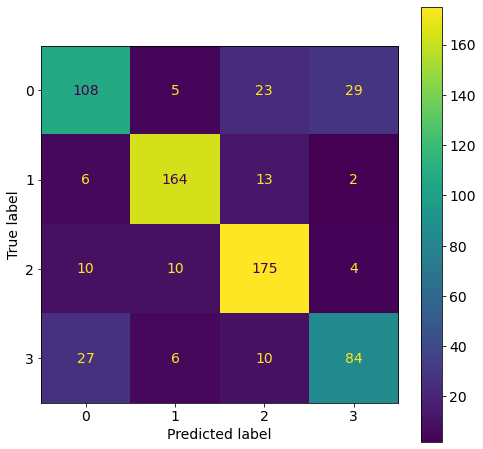

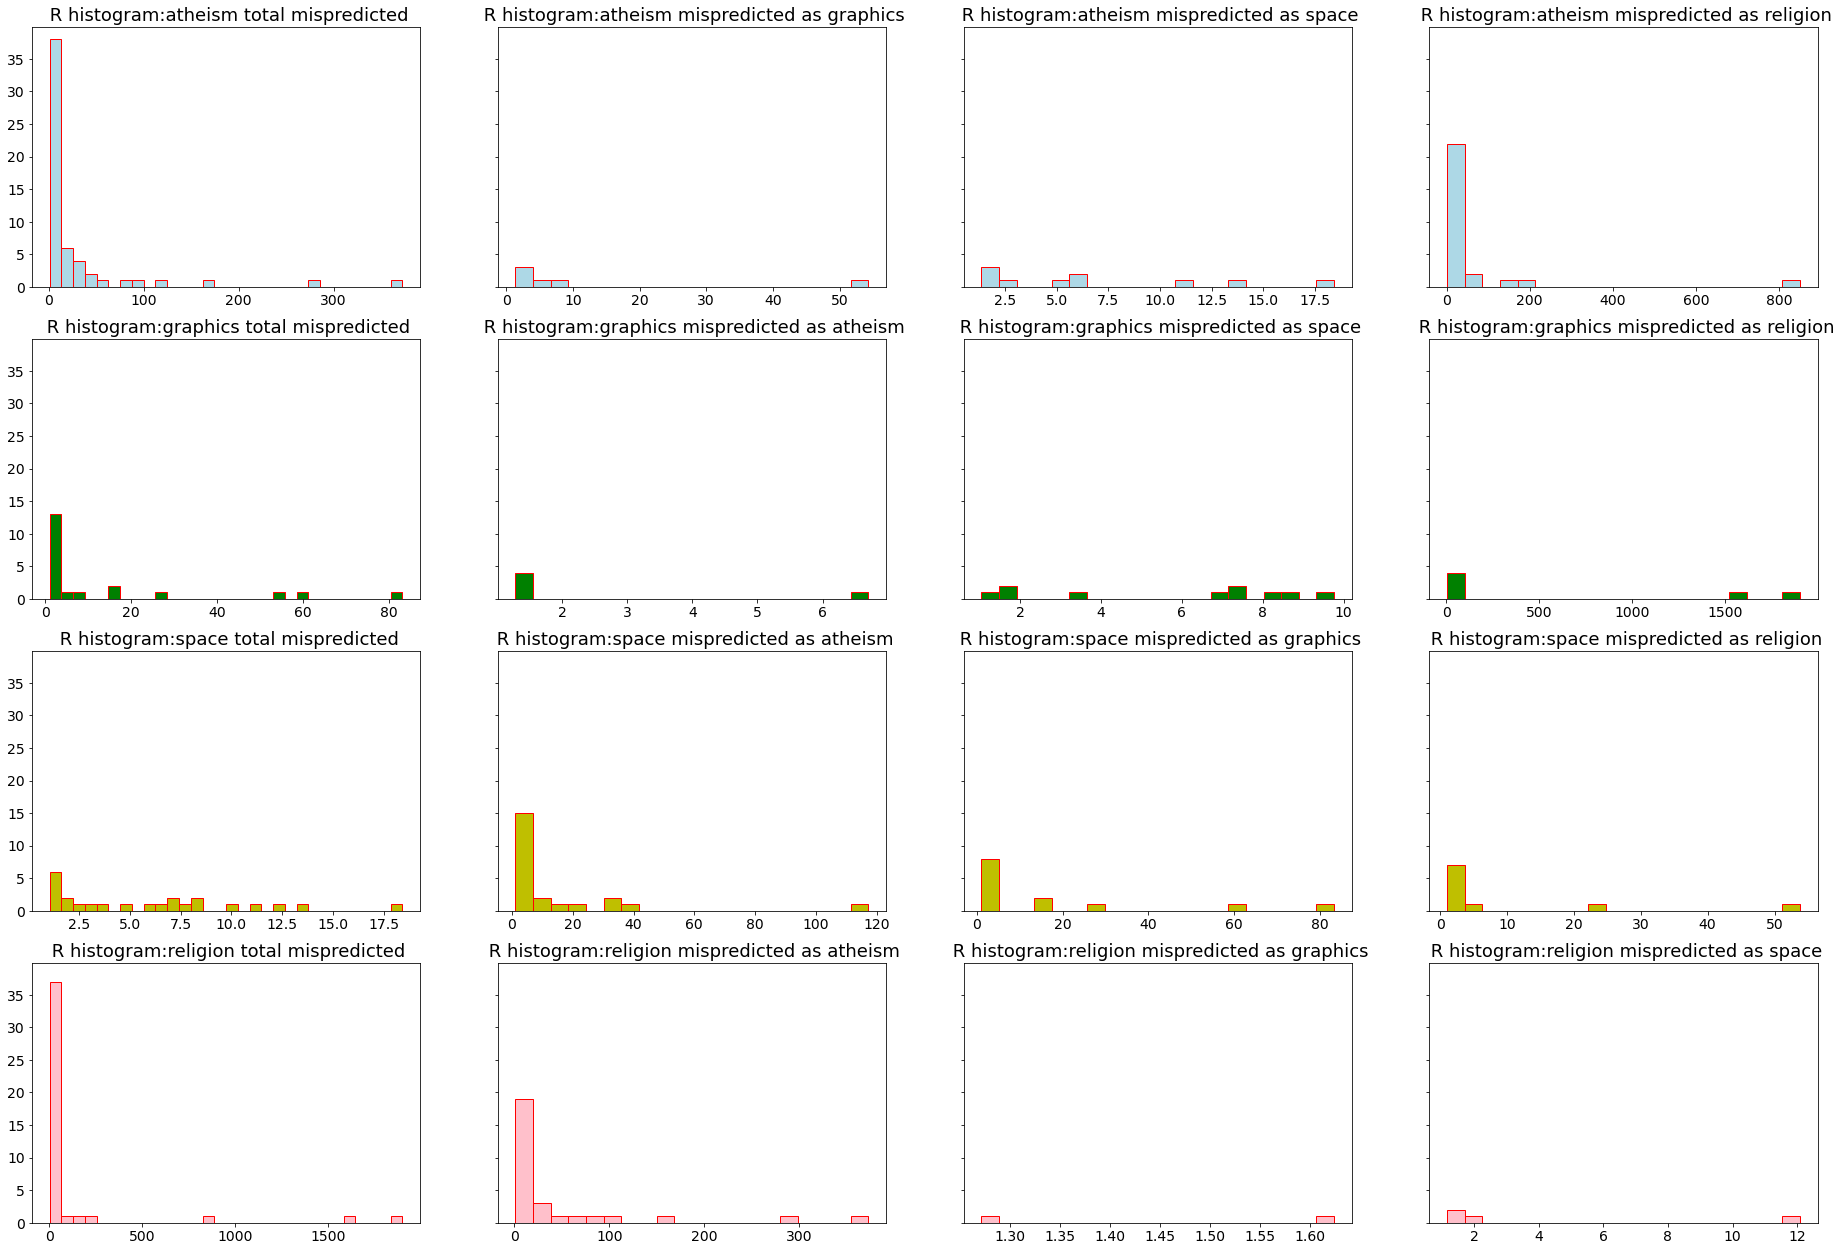

In [23]:
def P8():
### STUDENT START ###

    from sklearn.metrics import plot_confusion_matrix
 

    def find_stop_words():

        t0 = []
        t2 = []
        for i in range(len(train_labels)):
            if train_labels[i] == 0:
                t0.append(train_data[i])
            elif train_labels[i] == 3:
                t3.append(train_data[i])

        tfidf = TfidfVectorizer()

        X = tfidf.fit_transform(t0)
        terms = tfidf.get_feature_names()
        sums = X.sum(axis=0)
        data = []
        for col, term in enumerate(terms):
            data.append( (term, sums[0,col] ))
        ranking0 = pd.DataFrame(data, columns=['term','rank'])
        ranking0 = ranking0.sort_values('rank', ascending=False)
        ranking0 = ranking0.head(300)
        ranking0 = set(ranking0['term'])

        X = tfidf.fit_transform(t3)
        terms = tfidf.get_feature_names()
        sums = X.sum(axis=0)
        data = []
        for col, term in enumerate(terms):
            data.append( (term, sums[0,col] ))
        ranking3 = pd.DataFrame(data, columns=['term','rank'])
        ranking3 = ranking3.sort_values('rank', ascending=False)
        ranking3 = ranking3.head(300)
        ranking3 = set(ranking3['term'])


        top300_common_words_religion_atheism = list(ranking3 & ranking0 )
        print('There are ',len(top300_common_words_religion_atheism), 'words and combinations could try ')


        sub_list = [[]]      
        for i in range(len(top300_common_words_religion_atheism) + 1): 
            for j in range(i + 26, len(top300_common_words_religion_atheism) + 1): 
                sub = top300_common_words_religion_atheism[i:j] 
                sub_list.append(sub) 

        stop_words_set = sub_list 
        print(len(stop_words_set))

        print('There are',len(top300_common_words_religion_atheism),'words and', len(stop_words_set),
              'combinations could try as the stop_words in the model')

    #=======================================================================================    
    # below is the code that i used to try the best stop_words. It will take about 3 hours 
    # to complete. To save time, I comment the code segment off, and directly use the results 
    # in the following code:
    #==========================================================================================
        '''
        print('totla subset number is ===========', len(stop_words_set))    
        acc = []
        i = 1
        for stp in stop_words_set: 
            i = i+1
            TFIDF = TfidfVectorizer(stop_words= stp)  
            feature_vectors_train = TFIDF.fit_transform(raw_documents=train_data)
            LR_model = LogisticRegression(C=100, solver="liblinear", multi_class="auto") 
            LR_model.fit(feature_vectors_train, train_labels)
            feature_vectors_dev = TFIDF.transform(raw_documents=dev_data)
            dev_preds = LR_model.predict(feature_vectors_dev)
            f1_score = metrics.f1_score(y_true=dev_labels, y_pred=dev_preds, average='weighted')
            acc.append([stp, f1_score])
            print(i, f1_score)

        df = pd.DataFrame(acc, columns=['stop_words', 'f1_score'])
        print (df.to_string(index = False))
        max_f1_score = df.loc[:,'f1_score'].max()
        index = df['f1_score'].idxmax() 
        best_stop_words = df.at[index,'stop_words']
        print ('When stop_words =', best_stop_words, 
               ', maxmum F1 score for the Logistic Regression classifier is', max_f1_score, '\n\n\n')

        '''
    #==========================================================================================    
    # This is the result of the above code :   
    #
    #  ['faith', 'believe', 'wrong', 'religious', 'against', 'bible', 'jesus', 'kent', 
    #   'thought', 'own','least', 'life', 'should', 'even', 'may', 'really', 'world', 'reason', 
    #   'agree', 'evidence', 'rather',  
    #   'argument', 'morality', 'moral', 'statement', 'religion'])
    #  
    # From these words, we can find that they are mostly the common words in religion/atheism 
    #===========================================================================================    
         
    TFIDF = TfidfVectorizer(stop_words=  ['faith', 'believe', 'wrong', 'religious', 'against',  
                                            'bible', 'jesus', 'kent', 'thought', 'own','least', 
                                          'life', 'should', 'even', 'may', 'really', 'world', 'reason', 
                                          'agree', 'evidence', 'rather',  
                                           'argument', 'morality', 'moral', 'statement', 'religion'])
  
                                  
    feature_vectors_train = TFIDF.fit_transform(raw_documents=train_data)
    LR_model = LogisticRegression(  C= 285, solver="lbfgs", multi_class="multinomial")
   # LR_model = LogisticRegression( C= 100, solver="liblinear", multi_class="auto")
    LR_model.fit(feature_vectors_train, train_labels)
    feature_vectors_dev = TFIDF.transform(raw_documents=dev_data)
    dev_preds = LR_model.predict(feature_vectors_dev)
 
    accuracy = 100*metrics.accuracy_score(y_true=dev_labels, y_pred=dev_preds)
    print ('Accuracy for a Logistic Regression classifier using TfidfVectorizer: {0:.2f}%'.format(accuracy))
    
    dev_probs = LR_model.predict_proba(feature_vectors_dev)
    max_prob = dev_probs.max(axis=1)
    prob_correct_label = np.array([dev_probs[i,j] for i,j in zip(range(len(dev_labels)),dev_labels)])
    R = max_prob / prob_correct_label
    percentage = 100*len(R[R>1])/float(len(R))
    print ('Percentage of incorrectly predicted labels (R>1): {0:.2f}% (=1-Accuracy)\n'.format(percentage))
 
    
    df = pd.DataFrame(dev_labels, columns = ["dev_labels"])
    df2 = pd.DataFrame(max_prob, columns = ["max_prob"])
    df3 = pd.DataFrame(R, columns = ['R'] )
    df4 = pd.DataFrame(dev_preds, columns = ['dev_preds'] )
    df['max_prob'] =  df2['max_prob'] 
    df['R'] =  df3['R']    
    df['log_R'] = np.log(df['R'])
    df['dev_preds'] = df4['dev_preds'].astype(int)
    df['dev_labels'] = df['dev_labels'].astype(int)

    
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(LR_model, feature_vectors_dev, dev_labels, ax=ax)
    plt.show()


    fig, ((ax0, ax4, ax5, ax6), (ax1, ax7, ax8, ax9), (ax2, ax10, ax11, ax12), 
          (ax3, ax13, ax14, ax15)) = plt.subplots(nrows=4, ncols=4, sharey=True, figsize=(32,22))  
    plt.rcParams.update({'font.size':15})
    
    ax0.set_title(' R histogram:atheism total mispredicted')
    ax0.hist(df[(df['dev_labels']==0) & (df['log_R']>0)]['R'],30, color = "lightblue", ec="red")
    ax1.set_title(' R histogram:graphics total mispredicted')
    ax1.hist(df[(df['dev_labels']==1) & (df['log_R']>0)]['R'],30, color = "g", ec="red")
    ax2.set_title(' R histogram:space total mispredicted')
    ax2.hist(df[(df['dev_labels']==2) & (df['log_R']>0)]['R'],30, color = "y", ec="red")
    ax3.set_title(' R histogram:religion total mispredicted')
    ax3.hist(df[(df['dev_labels']==3) & (df['log_R']>0)]['R'],30, color = "pink", ec="red")
    ax4.set_title(' R histogram:atheism mispredicted as graphics')
    ax4.hist(df[(df['dev_preds']==0) & (df['dev_labels']==1)]['R'],20, color = "lightblue", ec="red") 
    ax5.set_title(' R histogram:atheism mispredicted as space')
    ax5.hist(df[(df['dev_preds']==0) & (df['dev_labels']==2)]['R'],20, color = "lightblue", ec="red")
    ax6.set_title(' R histogram:atheism mispredicted as religion')
    ax6.hist(df[(df['dev_preds']==0) & (df['dev_labels']==3)]['R'],20, color = "lightblue", ec="red")
    ax7.set_title(' R histogram:graphics mispredicted as atheism')
    ax7.hist(df[(df['dev_preds']==1) & (df['dev_labels']==0)]['R'],20, color = "g", ec="red")
    ax8.set_title(' R histogram:graphics mispredicted as space')
    ax8.hist(df[(df['dev_preds']==1) & (df['dev_labels']==2)]['R'],20, color = "g", ec="red")
    ax9.set_title(' R histogram:graphics mispredicted as religion')
    ax9.hist(df[(df['dev_preds']==1) & (df['dev_labels']==3)]['R'],20, color = "g", ec="red")                                   
    ax10.set_title(' R histogram:space mispredicted as atheism')                                   
    ax10.hist(df[(df['dev_preds']==2) & (df['dev_labels']==0)]['R'],20, color = "y", ec="red")
    ax11.set_title(' R histogram:space mispredicted as graphics')
    ax11.hist(df[(df['dev_preds']==2) & (df['dev_labels']==1)]['R'],20, color = "y", ec="red")
    ax12.set_title(' R histogram:space mispredicted as religion')
    ax12.hist(df[(df['dev_preds']==2) & (df['dev_labels']==3)]['R'],20, color = "y", ec="red")                                   
    ax13.set_title(' R histogram:religion mispredicted as atheism')                                                                      
    ax13.hist(df[(df['dev_preds']==3) & (df['dev_labels']==0)]['R'],20, color = "pink", ec="red")
    ax14.set_title(' R histogram:religion mispredicted as graphics')
    ax14.hist(df[(df['dev_preds']==3) & (df['dev_labels']==1)]['R'],20, color = "pink", ec="red")
    ax15.set_title(' R histogram:religion mispredicted as space')
    ax15.hist(df[(df['dev_preds']==3) & (df['dev_labels']==2)]['R'],20, color = "pink", ec="red")                             


### STUDENT END ###
P8()

#### Approach: 

Topic 'Religion' and 'atheism' are mostly confused with each other, my solution would be to exclude from the dictionary those common words of both dataset in the training model. In detail,

(1) find top 300 most common used words from each topic, do inner joint, result a set of words that are mostly common used by all topics;

(2) find top 300 most common used words from topic 'religion' and 'atheism, do inner joint, result a set of words that are mostly common by these 2 topics;

(3) minus (1) from (2);

(4) pickup words manually, then exclouds these words from the training model.



#### Conclusion:

(1) Result: after optimization, the accuracy for a Logistic Regression classifier using TfidfVectorizer is 78.55%, that is increased 2.22% comparing with original 76.33%;  Percentage of incorrectly predicted labels (R>1) is 21.45%, that is decreased 2.22% comparing with original 23.67%. In adiition, from the confusion metrix, the errors between the 2 class Religion and Atheism have been reduced. 

(2) I implemented an automatic solution to search what stop_words should be excluded.

(3)  I excluded stop_words from class Region and atheism,  as well as stop words that are common in multiple classes.

(4) The parameters of the logistic regression model are modified ( e.g. C= 300  etc) to serve the training better.

(5) I know there are many other options, such as lowercasing the text, however I only want to focus on the vocabulary confusion among 2 classes, hope to see if the problem can be solved using my approach and if the performance can be improved.   